In [1]:
import os
import cv2
import tensorflow as tf
from pdf2image import convert_from_path
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.callbacks import Callback
from tqdm import tqdm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
import seaborn as sns


2022-05-01 15:33:04.787596: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yasmine/jupyter/environment/lib/python3.8/site-packages/cv2/../../lib64:
2022-05-01 15:33:04.787684: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
path="/home/yasmine/Téléchargements/data/01/"
path1="/home/yasmine/Téléchargements/data/02/"
path2="/home/yasmine/Téléchargements/data/03/"
path3="/home/yasmine/Téléchargements/data/11/"
path4="/home/yasmine/Téléchargements/data/09/"
img_size=224 

lables=[]
data=[]
for filename in os.listdir(path):
    images = convert_from_path(path+filename)
    # Save pages as images in the pdf
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    lables.append(0)
for filename in os.listdir(path1):
    images = convert_from_path(path1+filename)
    # Save pages as images in the pdf
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    lables.append(1)
for filename in os.listdir(path2):
    images = convert_from_path(path2+filename)
    # Save pages as images in the pdf
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    lables.append(2)
for filename in os.listdir(path3):
    images = convert_from_path(path3+filename)
    # Save pages as images in the pdf
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    lables.append(3)
for filename in os.listdir(path4):
    images = convert_from_path(path4+filename)
    # Save pages as images in the pdf
    images[0].save('img.jpg', 'JPEG')
    image = cv2.imread('img.jpg')
    image = cv2.resize(image, (img_size,img_size))
    image = tf.keras.preprocessing.image.img_to_array(image)
    data.append(image)
    lables.append(4)

In [4]:
train_lables=to_categorical(lables)
train_images= np.array(data)
print(train_images.shape)
print(train_lables.shape)

(160, 224, 224, 3)
(160, 5)


In [5]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.05,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [6]:
#split data into train and test
train_images, test_images, train_lables, test_lables = train_test_split(train_images, train_lables, 
                                                    test_size=0.3,
                                                    random_state = 47)

In [7]:
print(train_images.shape)
print(train_lables.shape)
print(test_images.shape)
print(test_lables.shape)

(112, 224, 224, 3)
(112, 5)
(48, 224, 224, 3)
(48, 5)


In [8]:
SIZE = 224 
train_images,train_labels = shuffle(train_images,train_lables)

''' Initializing the VGG16 with imagenet pretrained weights, with out including top 3 layers,
Addition of custom layers and All layers of VGG16 is set to trainable'''

class myCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy')>=0.95):
          print("\nReached 95% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

model = VGG16(input_shape=(SIZE, SIZE, 3),weights='imagenet', include_top=False)
for layer in model.layers:
    layer.trainable=True #setting VGG Layers to trainable
output = model.output
output = Flatten()(output)
output = Dense(500,activation='relu')(output)
output = Dense(50,activation='relu')(output)
finallayer = Dense(5, activation='softmax')(output) 

model = Model(inputs = model.input, outputs=finallayer)

model.compile(optimizer = Adam(lr = 1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])


print(model.summary())

 

2022-05-01 15:34:22.121805: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-01 15:34:22.121900: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yasmine-Lenovo-ideapad-130-15IKB): /proc/driver/nvidia/version does not exist
2022-05-01 15:34:22.140229: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/home/yasmine/jupyter/environment/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = model.fit(aug.flow(train_images,train_labels, batch_size=32), validation_data=aug.flow(test_images, test_lables, batch_size=8),epochs=50, verbose=2, shuffle=True,callbacks=[callbacks])


Epoch 1/50
4/4 - 82s - loss: 0.5222 - accuracy: 0.8393 - val_loss: 0.4802 - val_accuracy: 0.8542 - 82s/epoch - 20s/step
Epoch 2/50
4/4 - 81s - loss: 0.3426 - accuracy: 0.8571 - val_loss: 0.1990 - val_accuracy: 0.8958 - 81s/epoch - 20s/step
Epoch 3/50
4/4 - 81s - loss: 0.2006 - accuracy: 0.9375 - val_loss: 0.2407 - val_accuracy: 0.9792 - 81s/epoch - 20s/step
Epoch 4/50

Reached 95% accuracy so cancelling training!
4/4 - 82s - loss: 0.1077 - accuracy: 0.9732 - val_loss: 0.0882 - val_accuracy: 0.9792 - 82s/epoch - 20s/step


In [15]:
model.save("VGG16_DocClassifierv3.model", save_format="h5")

In [36]:
print(test_lables.shape)

(32,)


In [16]:
result = updated_model.evaluate(test_images,test_lables)

2/2 [==============================] - 9s 2s/step - loss: 0.0277 - accuracy: 1.0000


In [42]:
print(result)

[0.10545714199542999, 1.0]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


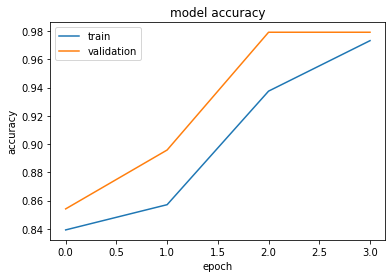

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


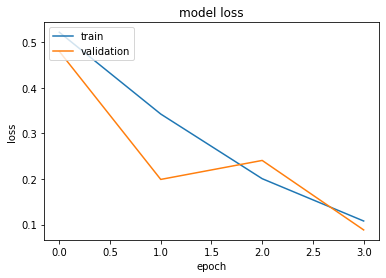

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path.eps', format='eps', dpi=1000)
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('destination_path1.eps', format='eps', dpi=1000)
plt.show()